<a href="https://colab.research.google.com/github/justkittenaround/Working-Parts/blob/master/pixl2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
URLs = [
'https://i.ebayimg.com/00/s/MTI4MFg3NDk=/z/V48AAOSwvvJfH5Gg/$_12.JPG?set_id=880000500F',
'https://i.ebayimg.com/00/s/MTYwMFgxMjAw/z/2KsAAOSw8Ehe1BqN/$_12.JPG?set_id=880000500F',
'https://i.ebayimg.com/00/s/MTU0MFg4MDA=/z/6V8AAOSwebdfLimt/$_12.JPG?set_id=880000500F',
'https://i.ebayimg.com/00/s/MTYwMFgxMjAw/z/FbYAAOSwi~RfGaWO/$_12.JPG?set_id=880000500F',
'https://i.ebayimg.com/00/s/MTYwMFgxMjAw/z/g0QAAOSwMexfE5b9/$_12.JPG?set_id=880000500F',
'https://i.ebayimg.com/00/s/MTYwMFgxMjAw/z/NUcAAOSw-LtfIccS/$_57.JPG?set_id=8800005007'
'https://i.ebayimg.com/00/s/MTM0MVgxNjAw/z/RJ8AAOSwAa9e84S2/$_57.JPG?set_id=8800005007',
'https://i.ebayimg.com/00/s/MTU5MVg5MTk=/z/nNgAAOSwqEVfI6mr/$_57.JPG?set_id=8800005007',
'https://i.ebayimg.com/00/s/MTYwMFgxMjAw/z/6a4AAOSwtVpeiNzS/$_57.JPG?set_id=8800005007',
'https://i.ebayimg.com/00/s/MTA2Nlg2MzQ=/z/yJgAAOSwM8RcA1rZ/$_57.JPG?set_id=8800005007',
'https://i.ebayimg.com/00/s/MTU1MVgxMDAy/z/xrUAAOSwr05d2Gq6/$_1.JPG?set_id=8800005007',
'https://i.ebayimg.com/00/s/NzkwWDQ2OA==/z/fkkAAOSwkWRfMmPn/$_1.JPG?set_id=880000500F',
'https://i.ebayimg.com/00/s/MTA0OVgxMjYw/z/z8QAAOSwOwJdFSak/$_3.JPG',
'https://i.ebayimg.com/00/s/MTYwMFg5MzU=/z/hBcAAOSwXI1dz3yt/$_57.JPG?set_id=8800005007',
'https://i.ebayimg.com/00/s/MTIwMFg3MTQ=/z/c8wAAOSwlsZfMvIg/$_1.JPG?set_id=880000500F',
'https://i.ebayimg.com/00/s/MTMyOFg4MTE=/z/mpEAAOSw6ohe47js/$_12.JPG?set_id=880000500F',
'https://i.ebayimg.com/00/s/MTUyMFg4MDA=/z/J0sAAOSwwnNeJRJG/$_12.JPG?set_id=880000500F',
'https://i.ebayimg.com/00/s/MTYwMFg5OTg=/z/-~UAAOSwHU9eCWW7/$_57.JPG?set_id=8800005007',
]

In [2]:
import cv2
import os, sys
import numpy as np
from skimage import io
from scipy import stats
from skimage import util 
from scipy import signal
import matplotlib.pyplot as plt
from urllib.request import urlretrieve
from google.colab.patches import cv2_imshow


In [3]:
def crop_im(url):
    print(url)
    urlretrieve(url, 'pic.jpg')
    im = cv2.imread('pic.jpg')
    hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV) 
    lower_red = np.array([0,130,150]) 
    upper_red = np.array([190,255,255]) 
    mask = cv2.inRange(hsv, lower_red, upper_red)
    cols = np.argmax(mask[:mask.shape[0]//3, :], 1)
    cols = cols[cols!=0]
    left = stats.mode(cols)[0][0]
    cols = np.argmax(np.flip(mask, 1)[:mask.shape[0]//4, :], 1)
    cols = cols[cols!=0]
    right = -stats.mode(cols[:36])[0][0]
    cols = np.argmax(np.flip(mask[:mask.shape[0]//4, :], 0), 0)
    cols = cols[cols!=0]
    top = np.abs(stats.mode(cols)[0][0]-mask.shape[0]//4)
    im = im[top:, left:right]
    # plt.imshow(im)
    # plt.show()
    return im


In [4]:
def mask_im(im):
    lower = np.array([0,0,0], dtype=np.uint8)
    upper = np.array([255,255,130], dtype=np.uint8)
    mask = cv2.inRange(im, lower, upper)
    # plt.imshow(mask-255)
    # plt.show()
    return mask-255

In [5]:
def process_im(masked):
    cols = np.argmax(masked[:, :masked.shape[1]//4], 1)
    cols = cols[cols!=0]
    if cols.any():
        left = stats.mode(cols)[0][0]
    else:
        left = 0
    cols = np.argmax(np.flip(masked,1)[:, :masked.shape[1]//4], 1)
    cols = cols[cols!=0]
    if cols.any():
        right = -stats.mode(cols)[0][0]
    else:
        right = masked.shape[1]
    pim = masked[:, left:right]
    return pim-1

In [6]:
def count_pixls(pim):
    cols = np.argmax(pim[:, :pim.shape[1]//4], 1)
    cols = cols[cols!=0]
    left = stats.mode(cols)[0][0]
    cols = np.argmax(np.flip(pim,1)[:, :pim.shape[1]//4], 1)
    cols = cols[cols!=0]
    right = stats.mode(cols)[0][0]
    print('Left Pixels:',left,'\n', 'Right Pixels:', right)
    print('Pixel ration left/right:', left/right)
    return left, right

https://i.ebayimg.com/00/s/MTYwMFgxMjAw/z/6a4AAOSwtVpeiNzS/$_57.JPG?set_id=8800005007


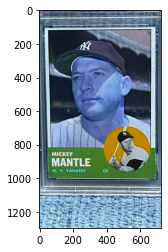

Left Pixels: 1 
 Right Pixels: 2
Pixel ration left/right: 0.5


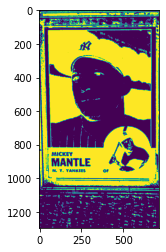

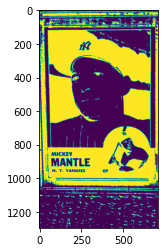

In [9]:
# for url in URLs:
url = URLs[7]
im = crop_im(url)
plt.imshow(im)
plt.show()
masked = mask_im(im)
pim = process_im(masked)
left, right = count_pixls(pim)

plt.imshow(pim)
plt.show()
plt.imshow(pim[:,left:-right])
plt.show()

https://i.ebayimg.com/00/s/MTYwMFgxMjAw/z/6a4AAOSwtVpeiNzS/$_57.JPG?set_id=8800005007


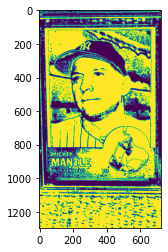

6 -19


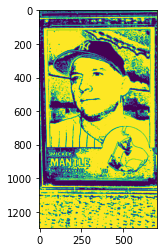

In [ ]:
url = URLs[7]
im = crop_im(url)
lower = np.array([0,20,50], dtype=np.uint8)
upper = np.array([255,255,150], dtype=np.uint8)
mask = cv2.inRange(im, lower, upper)
plt.imshow(mask-225)
plt.show()

##need to find a way to only count argmax if continuos for # columns

masked = mask-225
cols = np.argmax(masked[masked.shape[0]//10:-masked.shape[0]//3, :masked.shape[1]//4], 1)
cols = cols[cols!=0]

if cols.any():
    left = stats.mode(cols)[0][0]
else:
    left = 0

cols = np.argmax(np.flip(masked,1)[masked.shape[0]//10:-masked.shape[0]//3, :masked.shape[1]//4], 1)
cols = cols[cols!=0]
if cols.any():
    right = -stats.mode(cols)[0][0]
else:
    right = masked.shape[1]


print(left, right)
pim = masked[:, left:right]
plt.imshow(pim)
plt.show()